In [301]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [302]:
#import some python libraries
import csv, glob, os, sys, numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import timeit
from scipy.optimize import curve_fit
from scipy import optimize
from scipy.interpolate import griddata
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from scipy import signal
from numpy import NaN, Inf, arange, isscalar, asarray, array
import numpy.polynomial.polynomial as poly
import timeit
plt.rcParams['xtick.labelsize'] = 15; plt.rcParams['ytick.labelsize'] = 15 #make size of axis tick labels larger

#################################################################
noisefile = 'C:\\Users\\a6q\\Desktop\\CorrEL noise measurements\\2017-07-19 s-swcnt 7c noise h2o.txt' #CorrEl NOISE filename
sdline1, sdline2 = 14, 99 #lines to start and stop import of standard deviation data
#################################################################
sddata = pd.read_table(noisefile, skiprows=sdline1, error_bad_lines=False, sep='\s+') #read in file
sddata = sddata[:sdline2].apply(pd.to_numeric, errors='coerce') #str to flt, coerce to NaN, and erase past st. dev. data
print(sddata)

b'Skipping line 6452: expected 6 fields, saw 7\n'
C:\Users\a6q\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


       time       /             s  volt.noise/V  curr.noise/A  pow.noise/W
0       0.0  0.0193  1.150000e-09  3.070000e-12           NaN          NaN
1    1000.0  0.0191  1.120000e-09  2.910000e-12           NaN          NaN
2    2000.0  0.0193  1.110000e-09  2.660000e-12           NaN          NaN
3    3000.0  0.0192  1.100000e-09  2.910000e-12           NaN          NaN
4    4000.0  0.0192  1.090000e-09  3.010000e-12           NaN          NaN
5    5000.0  0.0191  1.100000e-09  3.080000e-12           NaN          NaN
6    6000.0  0.0192  1.130000e-09  2.940000e-12           NaN          NaN
7    7000.0  0.0190  1.120000e-09  2.880000e-12           NaN          NaN
8    8000.0  0.0190  1.090000e-09  2.680000e-12           NaN          NaN
9    9000.0  0.0191  1.190000e-09  2.710000e-12           NaN          NaN
10  10000.0  0.0191  1.130000e-09  3.050000e-12           NaN          NaN
11  11000.0  0.0191  1.110000e-09  2.790000e-12           NaN          NaN
12  12000.0  0.0189  1.09

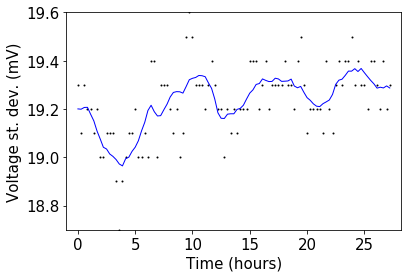

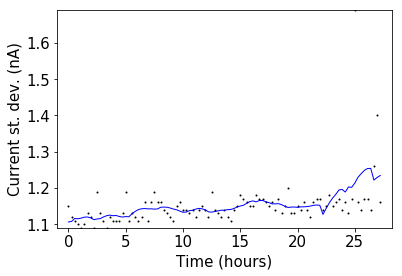

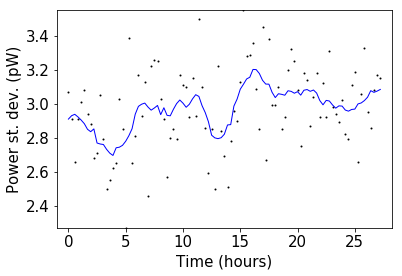

In [303]:
# organize standard deviation data
sdtime = np.array(sddata['time'])/3600
sdv = np.array(sddata['/'])*1e3 #voltage in mVolts
sdi = np.array(sddata['s'])*1e9 #current in nanoAmps
sdp = np.array(sddata['volt.noise/V'])*1e12 #power in pWatts

sdvars = [sdv, sdi, sdp] #list for sd plotting
sdlabels = ['Voltage st. dev. (mV)', 'Current st. dev. (nA)', 'Power st. dev. (pW)'] #list for y labels of plots
for i in range(len(sdvars)):
    #filter data for smoothing
    sdfilt = savgol_filter(sdvars[i], 21, 2, mode='mirror') #points, polynomial order, bound. cond.
    plt.plot(sdtime, sdfilt, color='b', linewidth=1) #plot filtered data
    plt.scatter(sdtime, sdvars[i], s=1, color='k') #plot raw sd data
    plt.xlabel('Time (hours)', fontsize=15); plt.ylabel(sdlabels[i], fontsize=15)
    plt.axis((min(sdtime)-1, max(sdtime)+1, min(sdvars[i]), max(sdvars[i])))
    plt.show()

In [304]:
# IMPORT FREQUENCY DOMAIMN DATA FILE #################################################################
fline1 = sdline2 + 17 #lines to start and stop import of frequency data
#####################################################################################################
fdata0 = pd.read_table(noisefile, skiprows=fline1, header=0, error_bad_lines=False, sep='\s+') #read in file
fdata = fdata0.apply(pd.to_numeric, errors='coerce').dropna() #change from string to float, coercing to NaN 
print(fdata)

b'Skipping line 6452: expected 4 fields, saw 7\n'
C:\Users\a6q\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


      Frequency/Hz  volt.noise/V  curr.noise/A   pow.noise/W
0           0.0000      0.002850  2.600000e-08  7.420000e-11
1           0.0005      0.002850  2.600000e-08  7.420000e-11
2           0.0010      0.000030  1.300000e-10  3.940000e-15
3           0.0015      0.000056  1.360000e-10  7.590000e-15
4           0.0020      0.000074  7.380000e-11  5.440000e-15
5           0.0025      0.000044  7.180000e-11  3.130000e-15
6           0.0030      0.000013  6.000000e-11  8.010000e-16
7           0.0035      0.000031  7.940000e-11  2.500000e-15
8           0.0040      0.000064  9.180000e-11  5.920000e-15
9           0.0045      0.000037  9.910000e-12  3.680000e-16
10          0.0050      0.000030  3.600000e-11  1.100000e-15
11          0.0055      0.000020  5.260000e-11  1.030000e-15
12          0.0060      0.000028  1.130000e-10  3.200000e-15
13          0.0065      0.000006  1.690000e-11  1.010000e-16
14          0.0070      0.000027  5.460000e-11  1.480000e-15
15          0.0075      

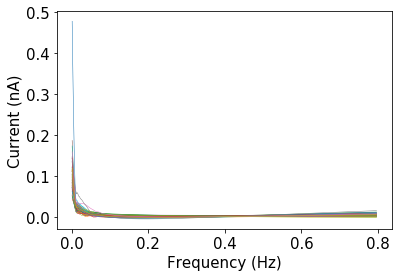

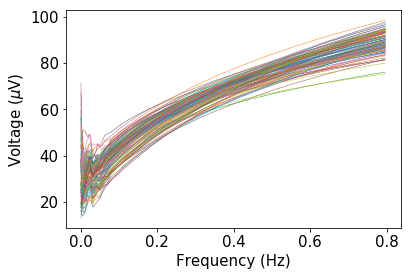

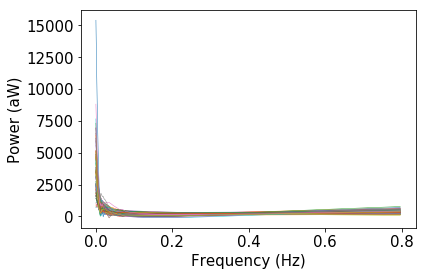

In [360]:
#convert columns into numpy arrays:
allf = np.array(fdata['Frequency/Hz']) #frequency in Hz
allv = np.array(fdata['volt.noise/V'])*1e6 #voltage in microVolts
alli = np.array(fdata['curr.noise/A'])*1e9 #current in nanoAmps
allp = np.array(fdata['pow.noise/W'])*1e18 #power in attoWatts

fsweep = []; i=0
while allf[i+1] > allf[i]: fsweep.append(allf[i]); i=i+1 #find length of each freq sweep

fmat0 = np.reshape(allf, (-1,len(fsweep)+1)); imat0 = np.reshape(alli, (-1,len(fsweep)+1)) #reshape into matrices
vmat0 = np.reshape(allv, (-1,len(fsweep)+1)); pmat0 = np.reshape(allp, (-1,len(fsweep)+1))

#set starting/ending indices to remove errant points from freq. measurements############################
si, ei = 2, 2
########################################################################################################
#new empty matrices without first/last couple points
fmat = np.ones((np.shape(fmat0)[0],np.shape(fmat0)[1]-si-ei));
vmat=np.copy(fmat); imat=np.copy(fmat); pmat=np.copy(fmat); zmat=np.copy(fmat)

for i in range(len(fmat)): #create matrices without the first/last couple points
    fmat[i] = fmat0[i][si:-ei]; vmat[i] = vmat0[i][si:-ei]
    imat[i] = imat0[i][si:-ei]; pmat[i] = pmat0[i][si:-ei]

fvars = [imat, vmat, pmat] #make lists for looping over plots
flabels = ['Current (nA)', 'Voltage ($\mu$V)', 'Power (aW)']

for j in range(len(flabels)): #plot filtered freq-dependent noise spectra
    for i in range(len(fmat)): 
        ffilt = savgol_filter(fvars[j][i], 41, 2, mode='interp') #points, polynomial order, bound. cond.
        plt.plot(fmat[i],ffilt, linewidth=.5) #plot noise
    plt.xlabel('Frequency (Hz)',fontsize=15); plt.ylabel(flabels[j],fontsize=15)
    plt.show()

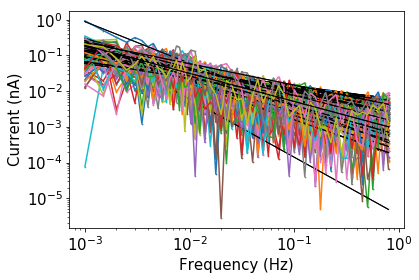

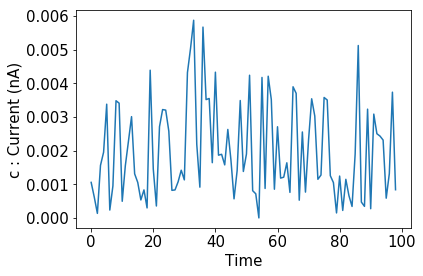

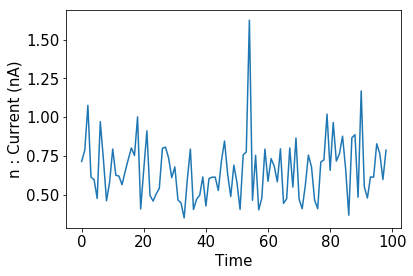

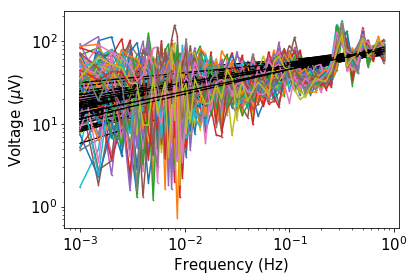

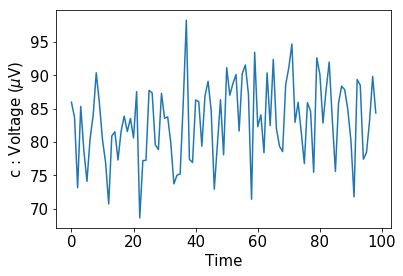

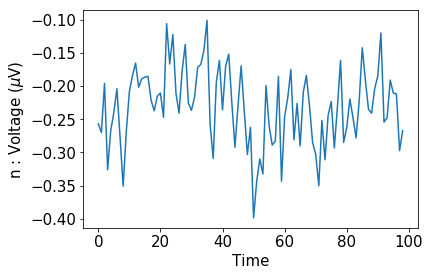

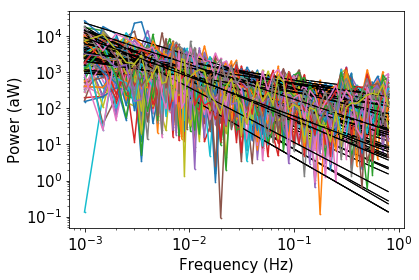

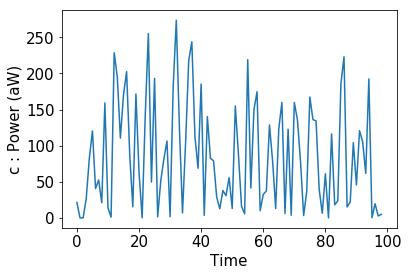

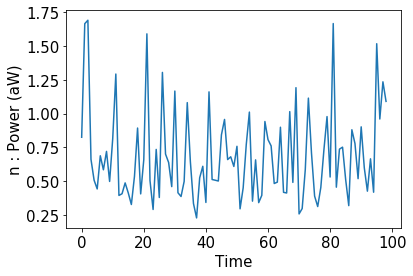

In [309]:
#fit noise to pink (1/f) or brown (1/f^2)
timecycle = np.arange(len(fmat)) #create time array

def noisefit(f, c, n):  # define variables in each function
    return c / f**n

for k in range(len(fvars)): #loop over varibles (current, power, impedance)
    clist = []; nlist = [] #save lists of fitting parameters
    for i in range(len(fmat)): #loop over number of timing cycles
        try:
            popt, pcov = curve_fit(noisefit, fmat[i], fvars[k][i]) #find fit parameters
            fit =  noisefit(fmat[i], *popt) #build fit line
            c = popt[0]; n = popt[1] #get fitting parameters from popt
            clist.append(c); nlist.append(n)
    
            plt.scatter(fmat[i],fvars[k][i], s=.5) #plot fits
            plt.plot(fmat[i],fit,linewidth=1, c='k')
        
            plt.loglog(fmat[i],fvars[k][i]) #plot fits
            plt.loglog(fmat[i],fit,linewidth=1, c='k')
        
        
        except RuntimeError: #if error in fitting, keep going amnd assign 0 values
            clist.append(0); nlist.append(0)
            print('error in fitting column index ' + format(i))

    plt.xlabel('Frequency (Hz)',fontsize=15); plt.ylabel(flabels[k],fontsize=15);
    plt.show()

    plt.plot(timecycle,clist)
    plt.xlabel('Time',fontsize=15); plt.ylabel('c : ' + flabels[k],fontsize=15); plt.show()

    plt.plot(timecycle,nlist)
    plt.xlabel('Time',fontsize=15); plt.ylabel('n : ' + flabels[k],fontsize=15); plt.show()


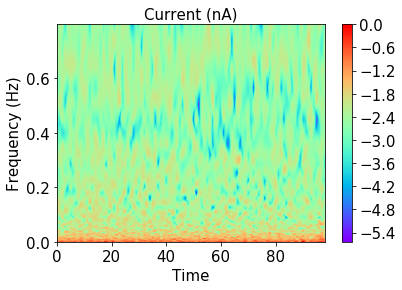

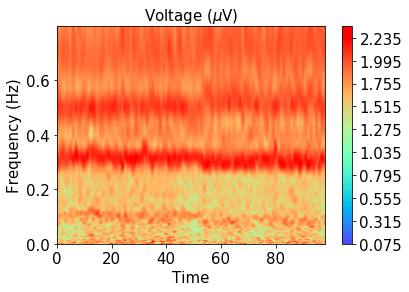

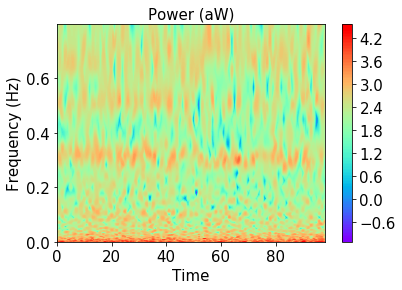

In [310]:
#plot in freq. domain over time

tmatflat = np.array([]) #make flat array of repeating "times"
for i in range(len(fmat)): tmatflat = np.append(tmatflat, np.ones(len(fmat[0]))*i)

fmatflat = fmat.flatten(); imatflat = imat.flatten()
vmatflat = vmat.flatten(); pmatflat = pmat.flatten(); zmatflat = zmat.flatten()

Zlist = [imatflat, vmatflat, pmatflat] #list of Z values in heatmaps

for i in range(len(Zlist)):  # plot heatmaps of time/frequency-dependent noise
    # set X, Y, and Z for plot
    X, Y, Z, = tmatflat, fmatflat, np.log10(Zlist[i]) #time, frequency, noise

    # create x-y points to be used in heatmap
    xi = np.linspace(X.min(),X.max(),1000)
    yi = np.linspace(Y.min(),Y.max(),1000)
    # Z is a matrix of x-y values
    zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')

    # Create the contour plot
    CS = plt.contourf(xi, yi, zi, 150, cmap=plt.cm.rainbow, vmax=np.amax(Z), vmin=np.amin(Z))
    plt.colorbar(); plt.xlabel('Time',fontsize=15); plt.ylabel('Frequency (Hz)',fontsize=15);
    plt.title(flabels[i],fontsize=15); plt.show()

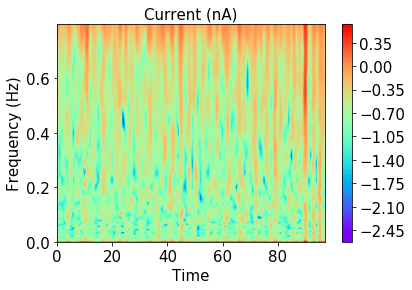

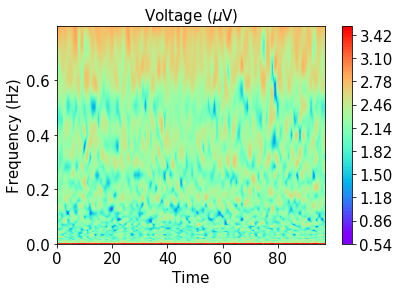

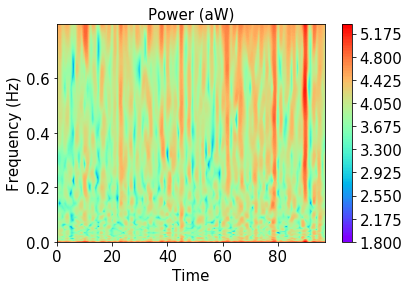

In [282]:
#plot FFT over time

tmatflat = np.array([]) #make flat array of repeating "times"
for i in range(len(fmat)): tmatflat = np.append(tmatflat, np.ones(len(fmat[0]))*i)

fmatflat = fmat.flatten()
imatfftflat = np.absolute(np.array(imatfft)).flatten() #take FFTs
vmatfftflat = np.absolute(np.array(vmatfft)).flatten()
pmatfftflat = np.absolute(np.array(pmatfft)).flatten()

Zlist = [imatfftflat, vmatfftflat, pmatfftflat] #list of Z values in heatmaps

for i in range(len(Zlist)):  # plot heatmaps of time/frequency-dependent noise
    # set X, Y, and Z for plot
    X, Y, Z, = tmatflat, fmatflat, np.log10(Zlist[i]) #time, frequency, noise

    # create x-y points to be used in heatmap
    xi = np.linspace(X.min(),X.max(),1000)
    yi = np.linspace(Y.min(),Y.max(),1000)
    # Z is a matrix of x-y values
    zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')

    # Create the contour plot
    CS = plt.contourf(xi, yi, zi, 150, cmap=plt.cm.rainbow, vmax=np.amax(Z), vmin=np.amin(Z))
    plt.colorbar(); plt.xlabel('Time',fontsize=15); plt.ylabel('Frequency (Hz)',fontsize=15);
    plt.title(flabels[i],fontsize=15); plt.show()

In [314]:
# IMPORT TIME-DOMAIN DATA ##########################################################################################
tdata = pd.read_csv(noisefile, skiprows=6452, header=0, error_bad_lines=False, sep='\s+') #read in file
####################################################################################################################
tfloatdata = tdata.apply(pd.to_numeric, errors='coerce') #change from string to float, coercing to NaN 
print(tfloatdata)

        volt.noise/V  curr.noise/A
0          -0.006868  3.144220e-08
1          -0.019623  3.006590e-08
2          -0.000566  3.349140e-08
3           0.004607  3.053440e-08
4          -0.024796  3.299860e-08
5           0.012785  3.101480e-08
6          -0.030366  3.136430e-08
7           0.020262  3.227060e-08
8          -0.031052  3.108350e-08
9           0.020065  3.238520e-08
10         -0.018663  3.065030e-08
11         -0.011858  3.380720e-08
12          0.003981  3.102420e-08
13         -0.022873  3.298180e-08
14          0.017776  3.125300e-08
15         -0.029313  3.162990e-08
16          0.018646  3.139170e-08
17         -0.034897  3.087150e-08
18          0.017485  3.257290e-08
19         -0.026474  3.022750e-08
20          0.000380  3.195630e-08
21         -0.005159  2.878880e-08
22         -0.021364  3.316340e-08
23          0.018417  3.269650e-08
24         -0.033861  3.277740e-08
25          0.019682  3.211050e-08
26         -0.031998  3.177470e-08
27          0.012511

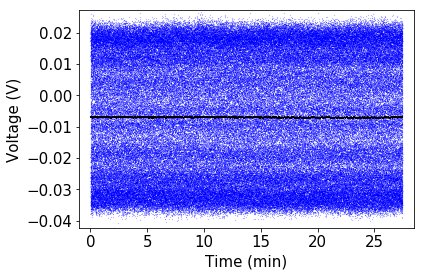

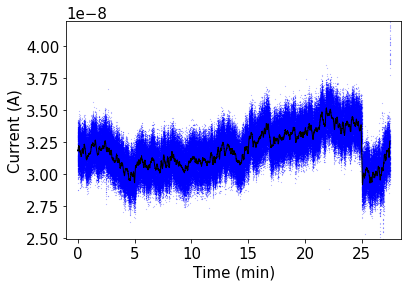

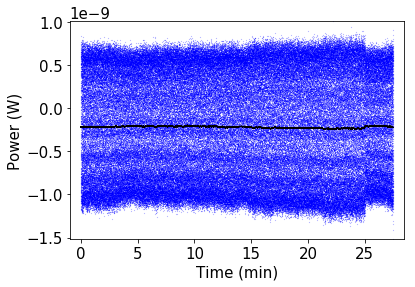

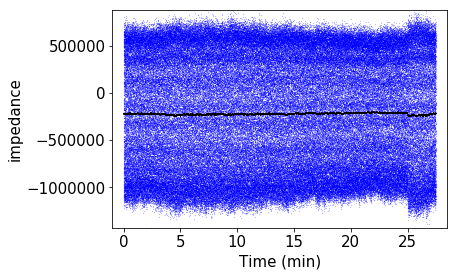

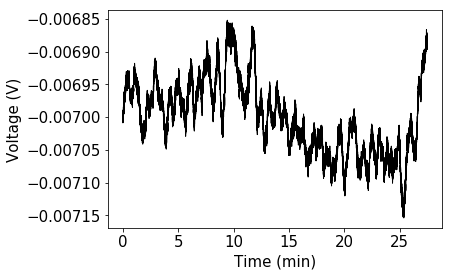

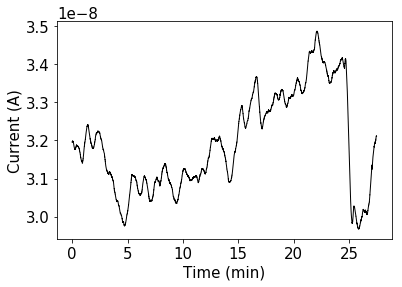

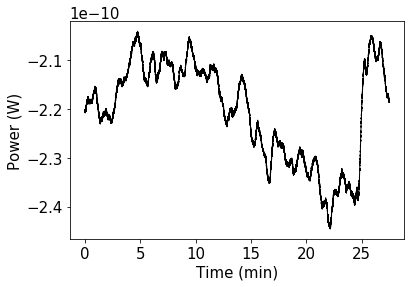

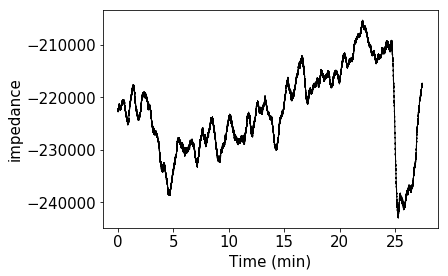

In [352]:
#ORGANIZE TIME-DOMAIN DATA
from scipy import signal

vt = np.array(tfloatdata['volt.noise/V']) #create voltage nad current arrays for time-domain data 
it = np.array(tfloatdata['curr.noise/A'])
pt = np.multiply(vt,it) #calculate power noise
t = (np.arange(len(vt))*0.488)/60/60 #create time array in hours

tvars = [vt, it, pt, np.divide(vt,it)] #create lists for looping
tlabels = ['Voltage (V)', 'Current (A)', 'Power (W)', 'impedance']

for i in range(len(tvars)): #plot noise with smoothed curves
    tfilt = savgol_filter(tvars[i], 1201, 2, mode='mirror') #points, polynomial order, bound. cond.
    plt.plot(t, tfilt,linewidth=1, c='k') #plot filtered/smoothed data
    plt.scatter(t, tvars[i], s=.01, c='b') #plot raw data
    plt.xlabel('Time (min)', fontsize=15); plt.ylabel(tlabels[i], fontsize=15)
    plt.axis((min(t)-1,max(t)+1,min(tvars[i]),max(tvars[i])))
    plt.show()
    
    
for i in range(len(tvars)): #plot just smoothed curves
    tfilt = savgol_filter(tvars[i], 5999, 2, mode='mirror') #points, polynomial order, bound. cond.
    plt.plot(t, tfilt,linewidth=1, c='k') #plot filtered/smoothed data
    plt.xlabel('Time (min)', fontsize=15); plt.ylabel(tlabels[i], fontsize=15)
    #plt.axis((min(t)-1,max(t)+1,np.min(tfilt[i]),np.max(tfilt[i])))
    plt.show()